# Vector data analysis

The vector data model represents space as a series of discrete entities such as such as borders, buildings, streets, and roads. There are three different types of vector data: points, lines and polygons. Online mapping applications, such as **Google Maps** and **OpenStreetMap**, use this format to display data. 

```{image} images/vector-data.png
:alt: vector
:width: 700px
:align: center
```

The Python library `GeoPandas` provides somes great tools for working with vector data. As the name suggests, `GeoPandas` extends the popular data science library `Pandas` by adding support for geospatial data. The core data structure in `GeoPandas` is the `GeoDataFrame`. The key difference between the two is that a `GeoDataFrame` can store geometry data and perform spatial operations.

```{image} images/dataframe.png
:alt: geodataframe
:width: 700px
:align: center
```

The `geometry` column can contain any geometry type (e.g. points, lines, polygons) or even a mixture.

## Reading files

Assuming we have a file containing both data and geometry (e.g. GeoPackage, GeoJSON, Shapefile), we can read it using `read_file`, which automatically detects the filetype and creates a `GeoDataFrame`. In the this demo, we will be working with two shapefiles containing 1) cities and towns (as points), and 2) counties (as polygons) in Oregon. 

In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd

cities = gpd.read_file('data/oregon_cities.shp')
cities.head()

,name,lat,lon,geometry
0,Adair Village city,44.67,-123.22,POINT (-123.22 44.67)
1,Adams,45.77,-118.56,POINT (-118.56 45.77)
2,Adrian,43.74,-117.07,POINT (-117.07 43.74)
3,Albany,44.63,-123.10,POINT (-123.1 44.63)
4,Aloha,45.49,-122.87,POINT (-122.87 45.49)


## DataFrame properties

We can analyze our `GeoDataFrame` using standard `Pandas` functions.

In [2]:
# Data types of each column
cities.dtypes

name          object
lat          float64
lon          float64
geometry    geometry
dtype: object

In [3]:
# Number of rows and columns
cities.shape

(377, 4)

In [4]:
# Name of columns
cities.columns

Index(['name', 'lat', 'lon', 'geometry'], dtype='object')

## Indexing

We can select specific columns based on the column values. The basic syntax is `dataframe[value]`, where `value` can be a single column name, or a list of column names.

In [5]:
# List the city names
cities['name']

0      Adair Village city
1                   Adams
2                  Adrian
3                  Albany
4                   Aloha
              ...        
372          Wood Village
373              Woodburn
374               Yachats
375               Yamhill
376              Yoncalla
Name: name, Length: 377, dtype: object

In [6]:
# List the latitudes and longitudes
cities[['lat','lon']]

,lat,lon
0,44.67,-123.22
1,45.77,-118.56
2,43.74,-117.07
3,44.63,-123.10
4,45.49,-122.87
...,...,...
372,45.54,-122.42
373,45.15,-122.86
374,44.31,-124.10
375,45.34,-123.19


We can select specific rows using the `.iloc` method.

In [7]:
# Second row
cities.iloc[1]

name                        Adams
lat                         45.77
lon                       -118.56
geometry    POINT (-118.56 45.77)
Name: 1, dtype: object

In [8]:
# Sixth to tenth rows
cities.iloc[5:10]

,name,lat,lon,geometry
5,Alpine,44.33,-123.36,POINT (-123.36 44.33)
6,Alsea,44.38,-123.60,POINT (-123.6 44.38)
7,Altamont,42.20,-121.72,POINT (-121.72 42.2)
8,Amity,45.12,-123.20,POINT (-123.2 45.12)
9,Annex,44.23,-116.99,POINT (-116.99 44.23)


## Masking

We can sample of our `DataFrame` based on specific values by producing a **Boolean mask** (i.e. a list of values equal to `True` or `False`). To find cities that are East of -117.5 degrees longitude, we could write:

In [9]:
mask = cities['lon'] > -117.5
cities[mask]

,name,lat,lon,geometry
2,Adrian,43.74,-117.07,POINT (-117.07 43.74)
9,Annex,44.23,-116.99,POINT (-116.99 44.23)
97,Enterprise,45.43,-117.28,POINT (-117.28 45.43)
134,Halfway,44.88,-117.11,POINT (-117.11 44.88)
150,Huntington,44.35,-117.27,POINT (-117.27 44.35)
164,Jordan Valley,42.98,-117.06,POINT (-117.06 42.98)
165,Joseph,45.35,-117.23,POINT (-117.23 45.35)
190,Lostine,45.49,-117.43,POINT (-117.43 45.49)
238,Nyssa,43.88,-117.00,POINT (-117 43.88)
247,Ontario,44.03,-116.98,POINT (-116.98 44.03)


It's more concise to just add the Boolean mask between square brackets. Here we find a specific city.

In [10]:
cities[cities['name'] == 'Eugene']

,name,lat,lon,geometry
100,Eugene,44.06,-123.12,POINT (-123.12 44.06)


Or cities that contain a `z` in their name. 

In [11]:
cities[cities['name'].str.contains('z')]

,name,lat,lon,geometry
34,Bonanza,42.20,-121.41,POINT (-121.41 42.2)
168,Keizer,45.00,-123.02,POINT (-123.02 45)
195,Manzanita,45.72,-123.94,POINT (-123.94 45.72)
206,Metzger,45.45,-122.76,POINT (-122.76 45.45)
302,Siletz,44.72,-123.92,POINT (-123.92 44.72)


## Descriptive statistics

`Pandas` provides basic functions to calculate descriptive statistics.

In [12]:
# Minimum latitude value
cities['lat'].min()

np.float64(42.0)

In [13]:
# Mean longitude value
cities['lon'].mean()

np.float64(-122.02392572944296)

A full list of descriptive statistics (including some very useful ones such as `sum` and `count`) can be found [here](https://pandas.pydata.org/docs/user_guide/basics.html#descriptive-statistics).

Sometimes we want to know which row contains the specific value which we can do using `idxmax`/`idxmin`.

In [14]:
cities['lat'].idxmin()

232

In [15]:
cities.iloc[232]

name           New Pine Creek
lat                      42.0
lon                    -120.3
geometry    POINT (-120.3 42)
Name: 232, dtype: object

## Sorting

We can sort `DataFrames` using the `sort_values` function. This function takes two arguments, `by` and `ascending` which determine which column and which order we would like to sort by. 

In [16]:
# Find the ten most northerly cities in Oregon
cities.sort_values(by='lat', ascending=False).head(10)

,name,lat,lon,geometry
13,Astoria,46.19,-123.81,POINT (-123.81 46.19)
354,Warrenton,46.17,-123.92,POINT (-123.92 46.17)
159,Jeffers Gardens,46.15,-123.85,POINT (-123.85 46.15)
363,Westport,46.13,-123.37,POINT (-123.37 46.13)
60,Clatskanie,46.10,-123.21,POINT (-123.21 46.1)
269,Rainier,46.09,-122.95,POINT (-122.95 46.09)
265,Prescott,46.05,-122.89,POINT (-122.89 46.05)
116,Gearhart,46.03,-123.92,POINT (-123.92 46.03)
293,Seaside,45.99,-123.92,POINT (-123.92 45.99)
341,Umapine,45.98,-118.50,POINT (-118.5 45.98)


An alternative way of doing this would be to use the `nlargest/nsmallest` functions.

In [17]:
cities.nlargest(n=10, columns='lat')

,name,lat,lon,geometry
13,Astoria,46.19,-123.81,POINT (-123.81 46.19)
354,Warrenton,46.17,-123.92,POINT (-123.92 46.17)
159,Jeffers Gardens,46.15,-123.85,POINT (-123.85 46.15)
363,Westport,46.13,-123.37,POINT (-123.37 46.13)
60,Clatskanie,46.10,-123.21,POINT (-123.21 46.1)
269,Rainier,46.09,-122.95,POINT (-122.95 46.09)
265,Prescott,46.05,-122.89,POINT (-122.89 46.05)
116,Gearhart,46.03,-123.92,POINT (-123.92 46.03)
293,Seaside,45.99,-123.92,POINT (-123.92 45.99)
341,Umapine,45.98,-118.50,POINT (-118.5 45.98)


## Geometric properties

The special thing about a `GeoDataFrame` is that it contains a `geometry` column. We can therefore apply spatial methods to these data. To demonstrate we will use our Oregon county shapefile. 

<Axes: >

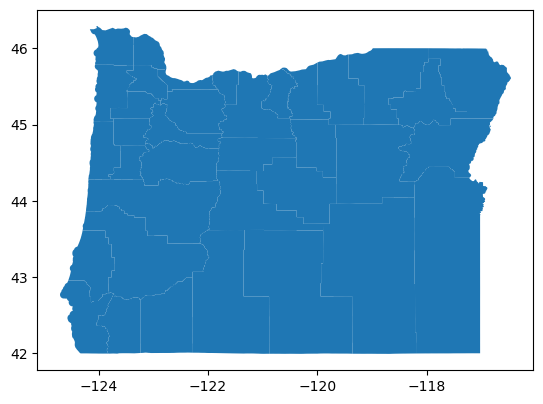

In [18]:
# Read shapefile
counties = gpd.read_file('data/orcntypoly.shp')
counties.plot()

## Projections

`GeoDataFrames` have their own **CRS** which can be accessed using the [`crs`](https://geopandas.org/en/stable/docs/user_guide/projections.html) method. The CRS tells `GeoPandas` where the coordinates of the geometries are located on the Earth's surface. 

In [19]:
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [20]:
counties['area'] = counties['geometry'].area
counties.head()

/var/folders/6m/lbbbs2n90xq6lk5v5902brkc0000gq/T/ipykernel_293/945249447.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  counties['area'] = counties['geometry'].area


,county,geometry,area
0,Josephine County,"POLYGON ((-123.22962 42.70261, -123.2296 42.69...",0.464440
1,Curry County,"POLYGON ((-123.81155 42.78884, -123.81155 42.7...",0.565393
2,Jackson County,"POLYGON ((-122.28273 42.9965, -122.28273 42.99...",0.793753
3,Coos County,"POLYGON ((-123.81155 42.78884, -123.81638 42.7...",0.518952
4,Klamath County,"POLYGON ((-121.33297 43.61665, -121.33296 43.6...",1.746031


We produced an `area` column but we were warned that our areas are likely to be incorrect. The reason is because the units of the county boundaries are in **degrees** (i.e. angular units). Since degrees vary in actual ground distance depending on location (for example, 1° longitude is ~111 km at the equator but almost 0 km at the poles), areas calculated directly from lat/lon values are meaningless. 

```{image} images/meridians.png
:alt: vector
:width: 700px
:align: center
```

To measure area correctly, we must reproject data into a **Projected** Coordinate System (PCS) with **linear units** (i.e. meters). We can reproject a our data using the `to_crs` method.

In [21]:
counties_reproject = counties.to_crs('EPSG:32610')
counties_reproject.crs

<Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

```{image} images/utm.png
:alt: vector
:width: 700px
:align: center
```

Now our data has a **projected CRS**, we can calculate the area of each county with no warnings.

In [22]:
counties_reproject['area'] = counties_reproject['geometry'].area
counties_reproject.head()

,county,geometry,area
0,Josephine County,"POLYGON ((481194.491 4727816.88, 481194.958 47...",4.246560e+09
1,Curry County,"POLYGON ((433625.945 4737685.67, 433625.841 47...",5.162413e+09
2,Jackson County,"POLYGON ((558467.407 4760675.759, 558469.593 4...",7.249715e+09
3,Coos County,"POLYGON ((433625.945 4737685.67, 433231.393 47...",4.684074e+09
4,Klamath County,"POLYGON ((634511.459 4830645.879, 634517.742 4...",1.588783e+10


In [23]:
counties_reproject.nlargest(n=10, columns='area')

,county,geometry,area
7,Harney County,"POLYGON ((882378.079 4887383.57, 882399.149 48...",2.653973e+10
10,Malheur County,"POLYGON ((961062.868 4921620.315, 961060.411 4...",2.581882e+10
5,Lake County,"POLYGON ((750439.186 4833367.767, 750479.131 4...",2.165555e+10
4,Klamath County,"POLYGON ((634511.459 4830645.879, 634517.742 4...",1.588783e+10
6,Douglas County,"POLYGON ((570239.73 4810068.418, 570239.824 48...",1.328787e+10
8,Lane County,"POLYGON ((594233.362 4901694.354, 594237.353 4...",1.222697e+10
15,Grant County,"POLYGON ((853221.257 4992269.09, 853253.647 49...",1.174878e+10
33,Umatilla County,"POLYGON ((887375.271 5106291.097, 887517.231 5...",8.385718e+09
32,Wallowa County,"POLYGON ((917855.824 5108106.858, 918248.122 5...",8.197782e+09
19,Baker County,"POLYGON ((989277.799 5010475.028, 989270.732 5...",8.026761e+09


## More geometric properties

There are other spatial methods we can apply to polygons such as the length of the outer edge (i.e. perimeter). 

In [24]:
counties_reproject['perimeter'] = counties_reproject['geometry'].length
counties_reproject.head()

,county,geometry,area,perimeter
0,Josephine County,"POLYGON ((481194.491 4727816.88, 481194.958 47...",4.246560e+09,331219.590167
1,Curry County,"POLYGON ((433625.945 4737685.67, 433625.841 47...",5.162413e+09,438569.197122
2,Jackson County,"POLYGON ((558467.407 4760675.759, 558469.593 4...",7.249715e+09,378774.026028
3,Coos County,"POLYGON ((433625.945 4737685.67, 433231.393 47...",4.684074e+09,341177.939179
4,Klamath County,"POLYGON ((634511.459 4830645.879, 634517.742 4...",1.588783e+10,619485.829095


Our `cities` `GeoDataFrame` also has geometric properties. We can access the latitude and longitude using the `x` and `y` methods.

In [25]:
cities['geometry'].x

0     -123.22
1     -118.56
2     -117.07
3     -123.10
4     -122.87
        ...  
372   -122.42
373   -122.86
374   -124.10
375   -123.19
376   -123.29
Length: 377, dtype: float64

In [26]:
cities['geometry'].y

0      44.67
1      45.77
2      43.74
3      44.63
4      45.49
       ...  
372    45.54
373    45.15
374    44.31
375    45.34
376    43.60
Length: 377, dtype: float64

## Measure distance

We can measure the distance between two points, provided they have a projected CRS.

In [27]:
cities_reproject = cities.to_crs('EPSG:32610')

In [28]:
eugene = cities_reproject[cities_reproject['name'] == 'Eugene'].reset_index()
bend = cities_reproject[cities_reproject['name'] == 'Bend'].reset_index()

In [29]:
eugene.distance(bend).values[0] / 1000

np.float64(144.97607871968486)

We can even compute the distance from Eugene to all cities in Oregon. We just have to convert our Eugene `GeoDataFrame` to a `shapely` `Point` object.

In [30]:
from shapely.geometry import Point
point = Point(eugene['geometry'].x, eugene['geometry'].y)
type(point)

shapely.geometry.point.Point

In [31]:
cities_reproject.distance(point)

0       68222.760516
1      407083.677355
2      487501.149310
3       63332.609637
4      160075.276651
           ...      
372    173473.943528
373    122821.981564
374     83104.796535
375    142292.638317
376     52886.634459
Length: 377, dtype: float64

In [32]:
cities_reproject['dist_from_eugene'] = cities_reproject.distance(point) / 1000 

In [33]:
cities_reproject.nsmallest(n=10, columns='dist_from_eugene')

,name,lat,lon,geometry,dist_from_eugene
100,Eugene,44.06,-123.12,POINT (490388.807 4878543.943),0.000000
62,Coburg,44.14,-123.06,POINT (495200.879 4887424.274),10.100312
309,Springfield,44.05,-122.98,POINT (501602.135 4877426.449),11.268874
74,Creswell,43.92,-123.02,POINT (498394.365 4862987.674),17.495327
346,Veneta,44.05,-123.35,POINT (471962.631 4877485.796),18.456534
166,Junction City,44.22,-123.21,POINT (483225.773 4896329.667),19.173968
139,Harrisburg,44.27,-123.17,POINT (486432.361 4901875.908),23.665038
69,Cottage Grove,43.80,-123.06,POINT (495173.424 4849661.421),29.276145
191,Lowell,43.92,-122.78,POINT (517661.989 4863011),31.386283
215,Monroe,44.32,-123.30,POINT (476077.414 4907459.292),32.263190


## Plot

If our data are in the same projection system, we can plot them together.

<Axes: >

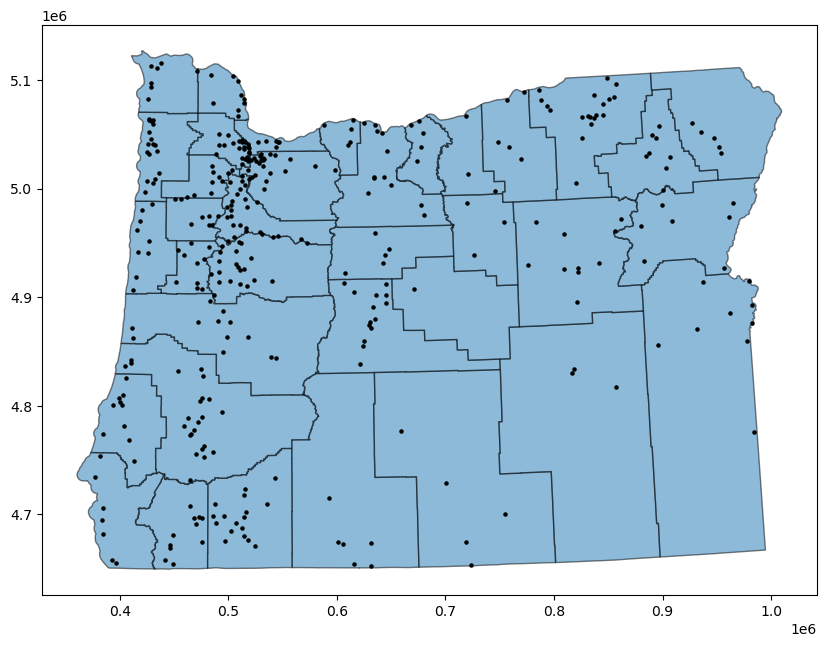

In [34]:
ax = counties_reproject.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cities_reproject.plot(ax=ax, color='black', markersize=5)

## Spatial joins

One of the most useful things about `GeoPandas` is that it contains functions to perform **spatial joins** to combine two `GeoDataFrames` based on the **spatial relationships** between their geometries.

The order of the two `GeoDataFrames` is quite important here, as well as the `how` argument. A **left** outer join implies that we are interested in **retaining the geometries** of the `GeoDataFrame` on the left, i.e. the **point** locations of the cities. We then retain attributes of the **right** `GeoDataFrame` if they intersect and drop them if they don't.

The following would provide the county attributes for all our cities based on a spatial intersection. 

In [35]:
cities_reproject.sjoin(counties_reproject, how="left").head()

,name,lat,lon,geometry,dist_from_eugene,index_right,county,area,perimeter
0,Adair Village city,44.67,-123.22,POINT (482561.392 4946316.184),68.222761,12,Benton County,1.755206e+09,235146.207283
1,Adams,45.77,-118.56,POINT (845212.127 5078087.252),407.083677,33,Umatilla County,8.385718e+09,481237.919385
2,Adrian,43.74,-117.07,POINT (977541.425 4860113.062),487.501149,10,Malheur County,2.581882e+10,768932.749866
3,Albany,44.63,-123.10,POINT (492067.91 4941854.29),63.332610,13,Linn County,5.969370e+09,426799.857671
4,Aloha,45.49,-122.87,POINT (510158.282 5037393.753),160.075277,27,Washington County,1.880526e+09,250776.514814


```{note}
The `geometry` column type is `POINT`.
```

On the other hand, a **right** outer join implies that we are interested in **retaining the geometries** of the `GeoDataFrame` on the right, i.e. the **polygons** of the counties. This time we keep all rows from the right `GeoDataFrame` and duplicate them if necessary to represent multiple hits between the two dataframes.

In [36]:
cities_reproject.sjoin(counties_reproject, how="right").head()

,index_left,name,lat,lon,dist_from_eugene,county,geometry,area,perimeter
0,53,Cave Junction,42.17,-123.65,214.270534,Josephine County,"POLYGON ((481194.491 4727816.88, 481194.958 47...",4.246560e+09,331219.590167
0,110,Fruitdale,42.42,-123.30,182.712845,Josephine County,"POLYGON ((481194.491 4727816.88, 481194.958 47...",4.246560e+09,331219.590167
0,128,Grants Pass,42.43,-123.33,181.818198,Josephine County,"POLYGON ((481194.491 4727816.88, 481194.958 47...",4.246560e+09,331219.590167
0,169,Kerby,42.20,-123.65,211.006589,Josephine County,"POLYGON ((481194.491 4727816.88, 481194.958 47...",4.246560e+09,331219.590167
0,203,Merlin,42.52,-123.43,172.862986,Josephine County,"POLYGON ((481194.491 4727816.88, 481194.958 47...",4.246560e+09,331219.590167


## Which county contains the most cities/towns?

We would do this would be to use the `groupby` function.

In [37]:
join = cities_reproject.sjoin(counties_reproject, how="left")

The first argument `groupby` accepts is the column we want group our data into (`county` in our case). Next, it takes a column (or list of columns) to summarize. Finally, this function does nothing until we specify **how** we want to group our data (`count`).

It's actually nice to **reset the index** after using `groupby` so that we end up with a DataFrame (rather than a Series). 

In [38]:
grouped = join.groupby('county')['name'].count().reset_index()
grouped.nlargest(n=10, columns='name')

,county,name
23,Marion County,25
33,Washington County,24
2,Clackamas County,23
9,Douglas County,23
21,Linn County,23
29,Umatilla County,19
28,Tillamook County,18
14,Jackson County,17
8,Deschutes County,14
19,Lane County,12


## Which county is furthest from Eugene?

In [39]:
grouped = join.groupby('county')['dist_from_eugene'].mean().reset_index()
grouped.nlargest(n=10, columns='dist_from_eugene')

,county,dist_from_eugene
31,Wallowa County,482.889501
22,Malheur County,470.534421
0,Baker County,440.425667
30,Union County,433.871378
29,Umatilla County,390.358136
12,Harney County,344.072705
11,Grant County,336.334826
24,Morrow County,324.247272
10,Gilliam County,281.414386
18,Lake County,280.863893
